<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
    
</CENTER>
<font size="5"></br> Copernicus Master on Digital Earth</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>October 20th 2020</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>
</CENTER>

</div>

# Lab Session: Dimension reduction

The goal of this lab is to get familiar with the concept of dimension reduction and visualization for high-dimensional data, using Principal Component Analysis (PCA)

In [169]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.decomposition import PCA

# Principal Component Analysis

The goal of this section is to perform PCA on a real hyperspectral dataset to see how it can help visualize, compress and interpret high dimensional remote sensing data. We will make use of the functions implemented in sci-kit learn, the standard Machine Learning Package for Python.

The data is provided courtesy of Naoto Yokoya and Japan Space Systems (only for this lab, please do not distribute). See

Matsuki, T., Yokoya, N., & Iwasaki, A. (2015). Hyperspectral tree species classification of Japanese complex mixed forest with the aid of LiDAR data. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 8(5), 2177-2187.

for more details.

First we load and visualize the data:

(207, 268)


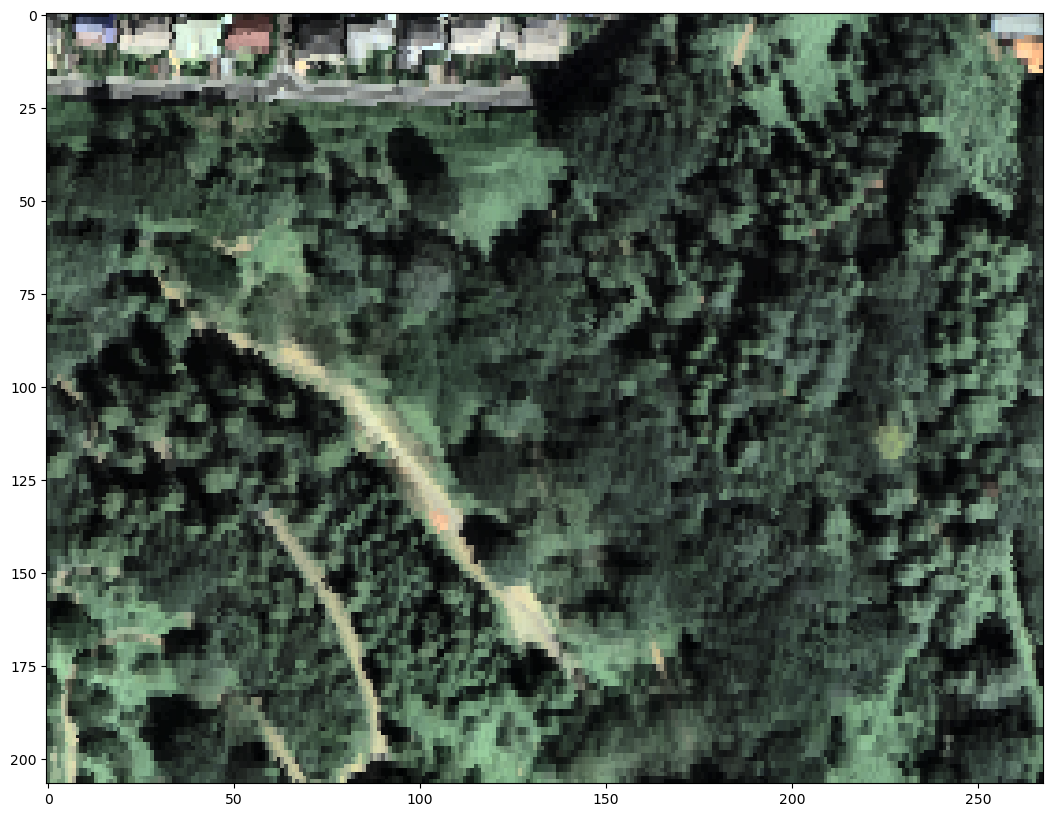

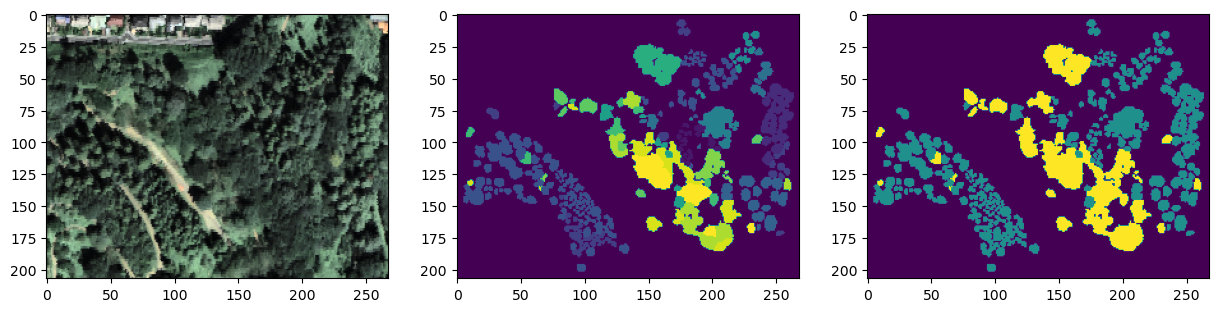

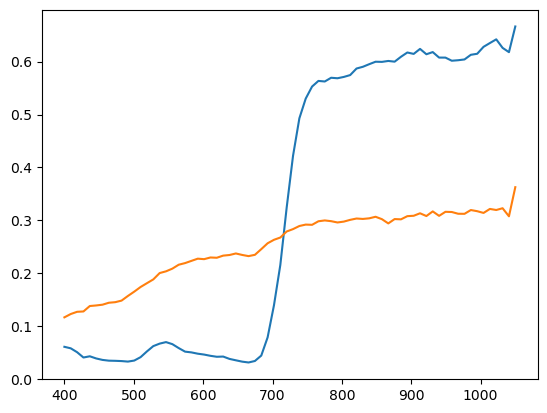

In [170]:
data = sio.loadmat("CASI3_North.mat")
rgb_data = sio.loadmat("rgb.mat")
classinfo = sio.loadmat("GT_North.mat")

wavelengths = np.linspace(400,1050,72) # 72 wavelenghts in the visible and near IR

im = data['hyper'].astype("double")

im = (im - np.amin(im))/(np.amax(im) - np.amin(im)) # rescale data between 0 and 1

imrgb = rgb_data['rgb_adjust']

class_img = classinfo['class']

# get labels for both classes: conifer trees and broadleaf trees

binary_class_img = np.zeros(np.shape(class_img))

print(binary_class_img.shape)

binary_class_img[class_img <=9] = 1 # conifer
binary_class_img[class_img >9] = 2 # broadleaf
binary_class_img[class_img == 0] = 0 # unclassified


# display

plt.figure(figsize=(15,10))
plt.imshow(imrgb)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imrgb)
plt.subplot(132)
plt.imshow(class_img)
plt.subplot(133)
plt.imshow(binary_class_img)

plt.figure()
plt.plot(wavelengths, im[50,50,:]) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:]) # one man made pixel

**Q: What are the main broad classes of materials that are present in the image?**

The main classes are three. Conifers, broad leaf trees and man made houses.

(72, 7726)
(72, 4895)


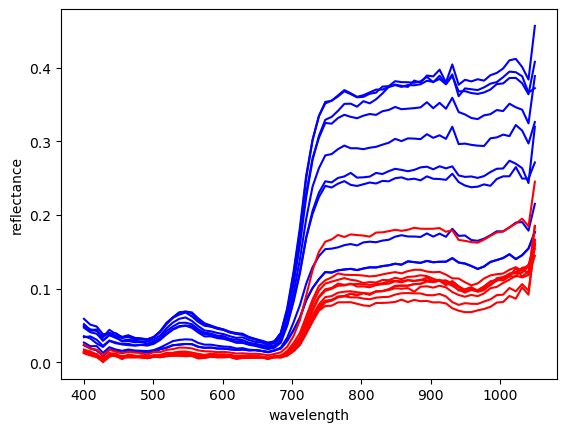

555.6338028169014
702.1126760563379


In [171]:
# %matplotlib qt
%matplotlib inline

[m,n,L] = np.shape(im)
im_r = np.reshape(im,(m*n,L)).T # we reshape the data cube into a matrix of size LxN, with L the number
# of wavelgnths and N the number of pixels

conifer_pixels = im[binary_class_img == 1,:].T
print(conifer_pixels.shape)

broadleaf_pixels = im[binary_class_img == 2,:].T
print(broadleaf_pixels.shape)


plt.figure()
plt.plot(wavelengths,conifer_pixels[:,0:10], 'b')
plt.plot(wavelengths,broadleaf_pixels[:,0:10],'r')
plt.xlabel('wavelength')
plt.ylabel('reflectance')
plt.show()

print(wavelengths[17])
print(wavelengths[33])

**Q: What are the main differences between spectra of conifer and broadleaf trees?**

Spectra of conifers is giving more reflectance in most part of the spectrum and espcially in the near infrared part..

**Q: First plot the mean value of the data (the mean spectrum over all pixlels). Does it look more like a vegetation spectrum or the spectrum of some man-made material? Why?**

#### plot mean values of data over all pixels.

The plot resemebles more of vegetation spectrum

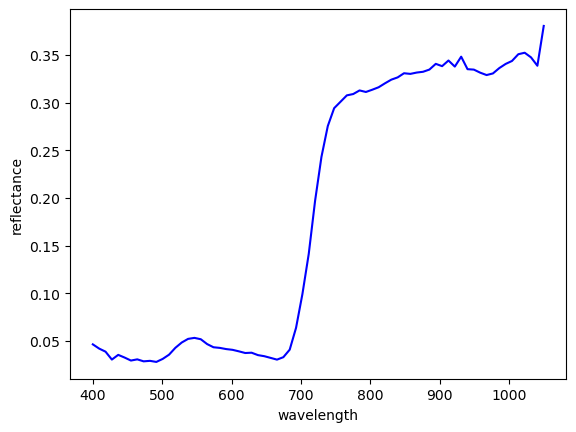

In [172]:
mean_val=np.mean(im_r,axis=1)
plt.figure()
plt.plot(wavelengths,mean_val, 'b')
plt.xlabel('wavelength')
plt.ylabel('reflectance')
plt.show()

We will use the built-in scikit learn functions to represent the principal components and the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Q: Use the PCA class to compute the decomposition, using pca.fit, with 72 components (all of them).\
Plot the eigenvalues, together with the explained variance as functions of the component number, you can recover them with pca.singular_values_ and pca.explained_variance_ratio_.**

**Similarly, use pca.components to recover the components, and plot them. What do they look like and what are their dimensions?** 

**Finally, compute the coefficients of the decomposition using pca.transform. What are their dimensions?**

**You can represent them as images, if you reshape them (use the function numpy.reshape for that).**

**Can you interpret some of the components using the coefficients as well as the components themselves (what do they represent)?**


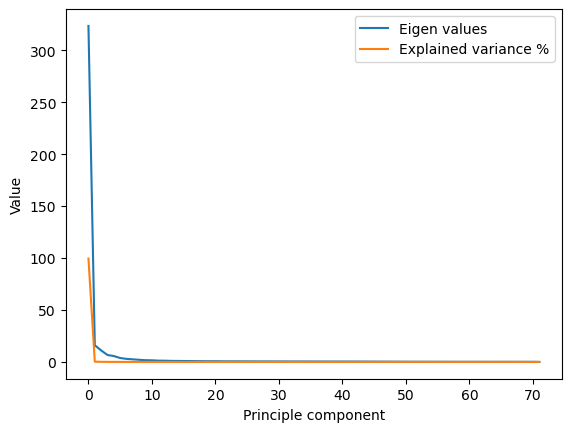

In [173]:
# PCA components

# Compute the PCA

n_components = 72
pca = PCA(n_components=n_components)

# Fit PCA
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(im_r)
a=scaler.transform(im_r)'''
pca.fit(im_r)

## TO DO ##

# Get eigenvalues
eigenvalues= pca.singular_values_

## TO DO ##
explained_variance=pca.explained_variance_ratio_

# display
plt.figure()
plt.plot(eigenvalues, label="Eigen values")
plt.plot(explained_variance*100, label="Explained variance %")

## TO DO ##
plt.xlabel('Principle component')
plt.ylabel('Value')
plt.legend()
plt.show()

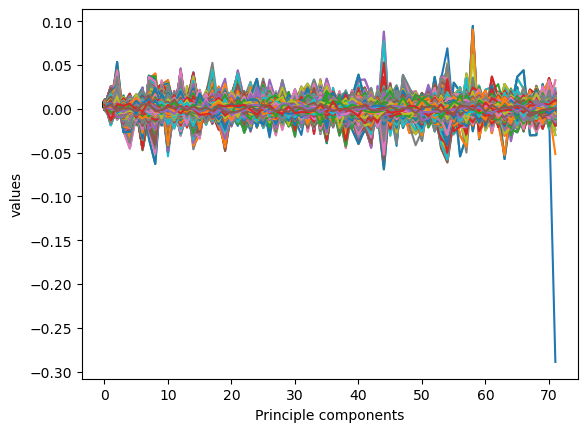

In [174]:
plt.figure()
plt.plot(pca.components_)

## TO DO ##
plt.xlabel('Principle components')
plt.ylabel('values')
plt.show()

In [175]:
pca.components_.shape

(72, 55476)

#### Dimensions for the output of principle components analysis is principle components (equal to the number of bands) times number of pixels.
Total number of bands in principle component analysis is 72 and number of pixels is 55476. 

#### Eigen values plot

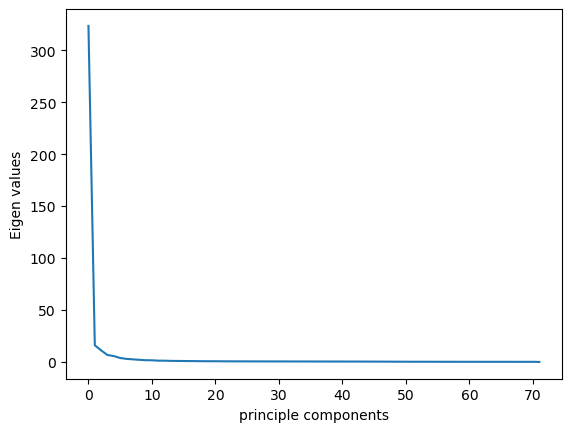

In [176]:
plt.figure()
plt.plot(eigenvalues)

## TO DO ##
plt.xlabel('principle components')
plt.ylabel('Eigen values')
plt.show()

Coefficient of the decomposition using principle components analysis transform function.

In [177]:
coefficients = pca.transform(im_r[:])
coefficients.shape

(72, 72)

- The dimensions of coefficients of the decomposition is 72 rows and 72 columns.

Coefficients as image:

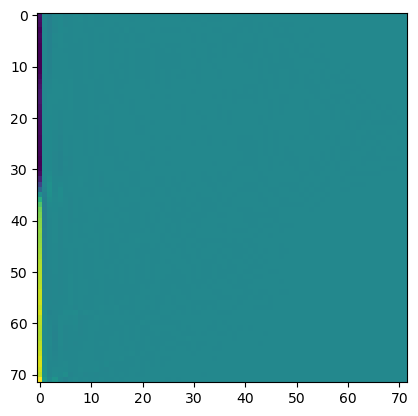

In [178]:
#coefficients as image
plt.imshow(np.reshape(coefficients,(72,72)))

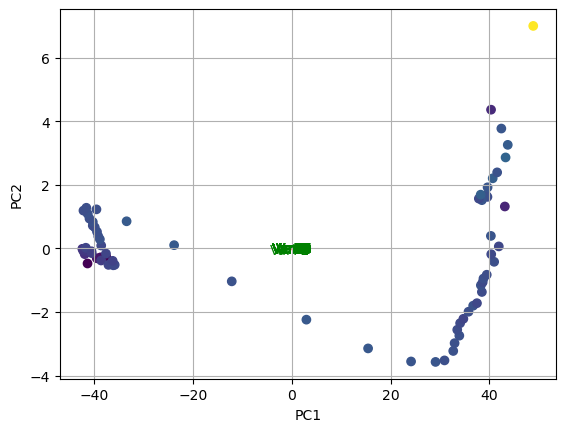

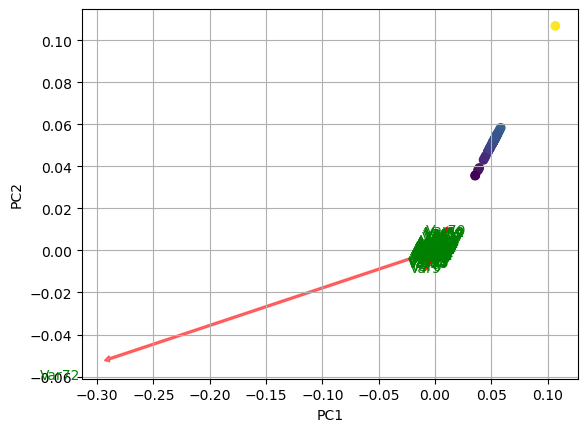

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y=im_r[:,0]
    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

x_new=pca.fit_transform(im_r)
#Call the function. 
myplot(x_new[:,0:2], pca.components_)
plt.show()
plt.figure()
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(im_r[:,0:2],pca.components_)
plt.show()

**Q: Almost all the variance in the data is explained by only a few components: are they interpretable? What parts of the image do they explain, respectively?**

 Yes. The components are somewhat interpreable. First component explain ***built up area*** (homes). Second component mainly explain mainly vegetation, (the forested area, conifers and broad leaf trees)

We define a function to enhance the brigthness of an RGB image:

In [180]:
# from skimage import color, exposure

def enhance_brightness_rgb(rgb_original):
    yuv= color.rgb2yuv(rgb_original) # change color space to radiance, chrominance
    p_low, p_high = np.percentile(yuv[:,:,0], (0.1,99.9)) # saturate outlier values in radiance (0.1,99.9)
    yuv[:,:,0] = exposure.rescale_intensity(yuv[:,:,0], in_range=(p_low, p_high)) # rescale radiance
    mod_rgb =  color.yuv2rgb(yuv) # transform back to rgb space
    return mod_rgb
mod_rgb = enhance_brightness_rgb(imrgb)

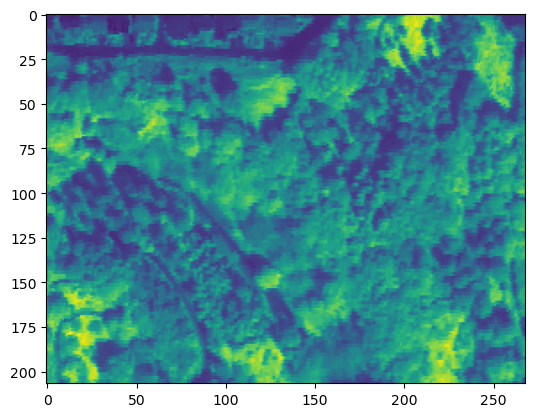

In [181]:
# First principle component display 
plt.imshow(np.reshape(pca.components_[0],(207,268)))

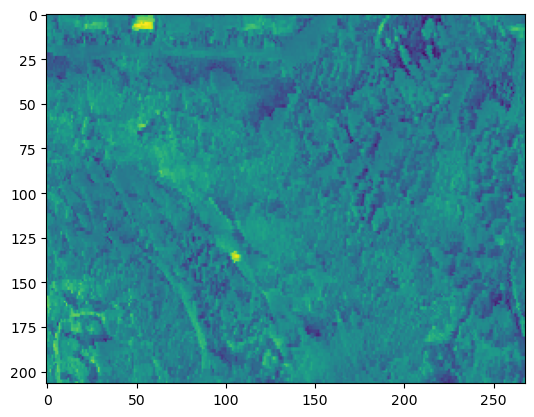

In [182]:
# Second principle component display 
plt.imshow(np.reshape(pca.components_[1],(207,268)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


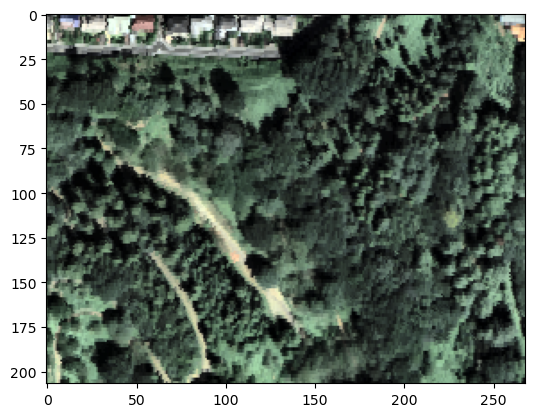

In [183]:
plt.imshow(mod_rgb)

**Q: The dataset can be projected in the 2D latent space given by the first 2 principal components (each pixel is represented only by the first two coefficients of the PCA decomposition). Make a scatterplot of the data points in the space spanned by the first 2 eigenvectors. Can you locate vegetation pixels, and others?**


You can use as colors the binary image with the class labels to spot conifer and broadleaf pixels.

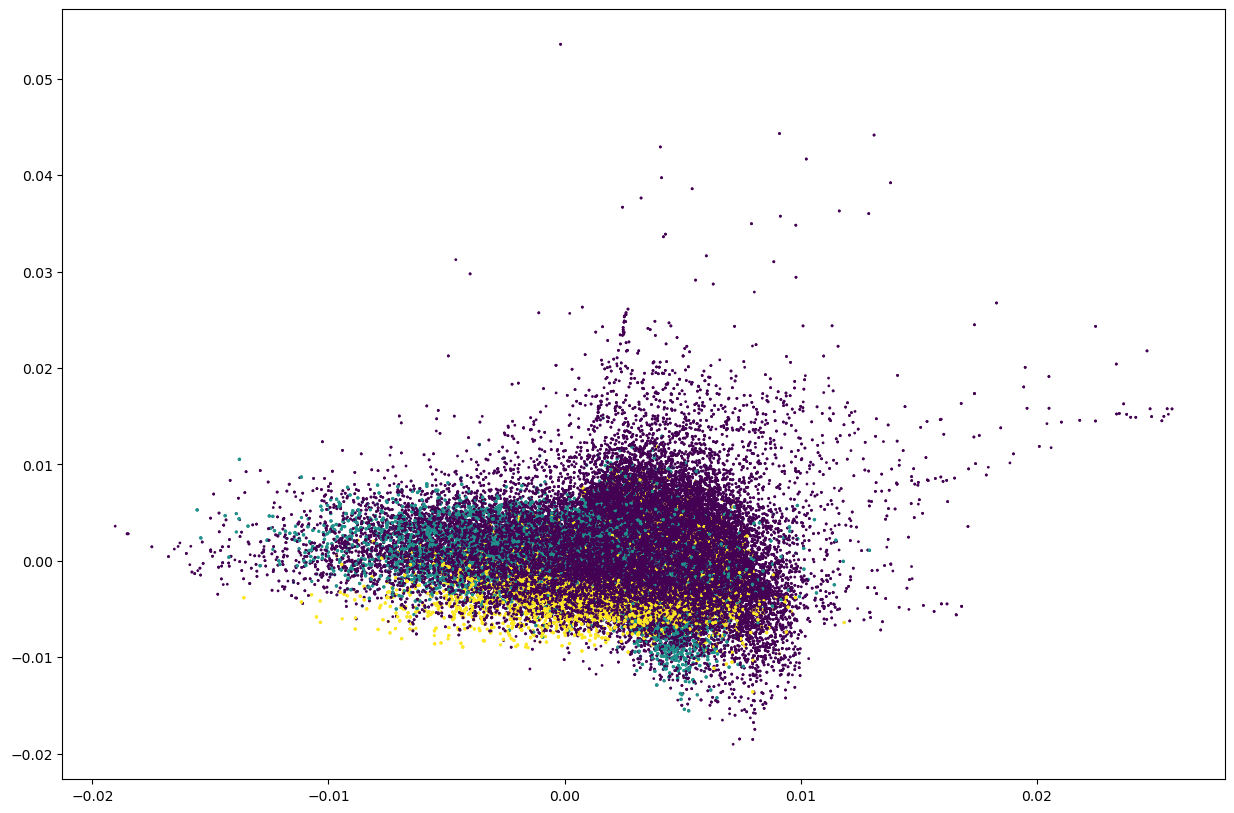

In [184]:
plt.figure(figsize = (15,10))
plt.scatter(pca.components_[0],pca.components_[1], c = binary_class_img.ravel(),s=(1+(binary_class_img.ravel()!= 0)))
    
plt.scatter(pca.components_[1],pca.components_[2], c = binary_class_img.ravel(),s=(1+(binary_class_img.ravel()!= 0)))


Location of vegetation pixels from above plot was difficult to locate

(207, 268)


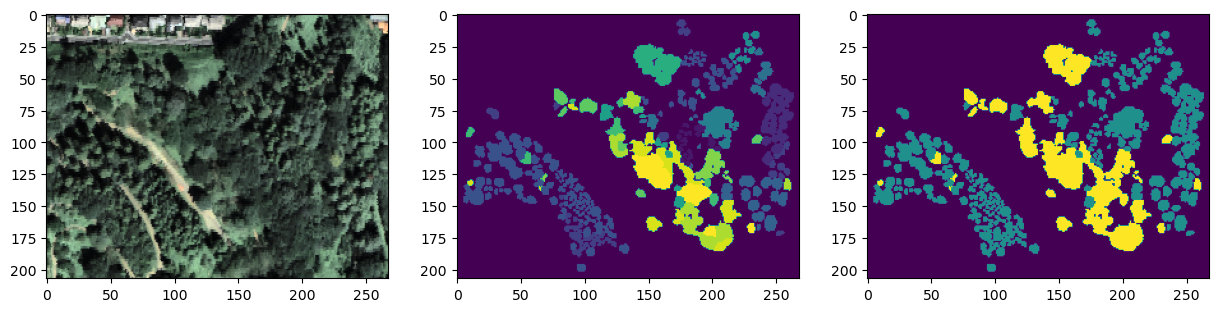

In [185]:
print(binary_class_img.shape)

binary_class_img[class_img <=9] = 1 # conifer
binary_class_img[class_img >9] = 2 # broadleaf
binary_class_img[class_img == 0] = 0 # unclassified
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imrgb)
plt.subplot(132)
plt.imshow(class_img)
plt.subplot(133)
plt.imshow(binary_class_img)

**Q: Reconstruct the image using 1,2,5,10 and 72 components. Visually assess and describe in each case how well the data is reconstructed (e.g. by comparing the reconstructed rgb image with the true one, or plotting reconstructed spectra). Compute the mean absolute error in each pixel in each case**

The reconstruction for all data points using K components can be obtained by computing:
\begin{equation*}
\hat{\mathbf{X}} = \bar{\mathbf{X}} + \mathbf{U}_{K}\mathbf{A}_{K} 
\end{equation*}
where $\hat{\mathbf{X}}\in\mathbb{R}^{D\times N}$, and  $\mathbf{U}\in \mathbb{R}^{D\times K}$, and $\mathbf{A}^{K\times N}$. $\bar{\mathbf{X}}\in\mathbb{R}^{D\times N}$ is  a matrix containing the mean of the data in each column.

In [186]:
# https://stackoverflow.com/questions/58566509/how-to-reconstruct-image-from-first-component-in-python-after-pca
projected = pca.fit_transform(im_r)

# First get your first component
first_component = pca.components_[0]
# Make sure your first component is a row vector
first_component = first_component.reshape(1,-1) 

# get the first projection 
first_proj = projected[:,0]
# Make sure your first component is a column vector
first_proj = first_proj.reshape(-1,1)
# do inverse transform (No you have to add the mean as thse algorithm 
# works on zero mean data) 
recon_using_first_comp = np.dot(first_proj, first_component) + pca.mean_

from sklearn.feature_extraction import image
final_img = image.reconstruct_from_patches_2d(recon_using_first_comp.reshape(-1,207,268), im_r.shape)


In [187]:
ua=np.matmul(coefficients,pca.components_)
print(ua.shape)
print(im_r.mean(axis=1).shape)
x_mean = np.broadcast_to(im_r.mean(axis=1).reshape(-1,1), im_r.shape)
print(x_mean.shape)


(72, 55476)
(72,)
(72, 55476)


Used numpy broadcast function to duplicate the rows for the mean values for meeting up with the dimensions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 3000x1500 with 0 Axes>

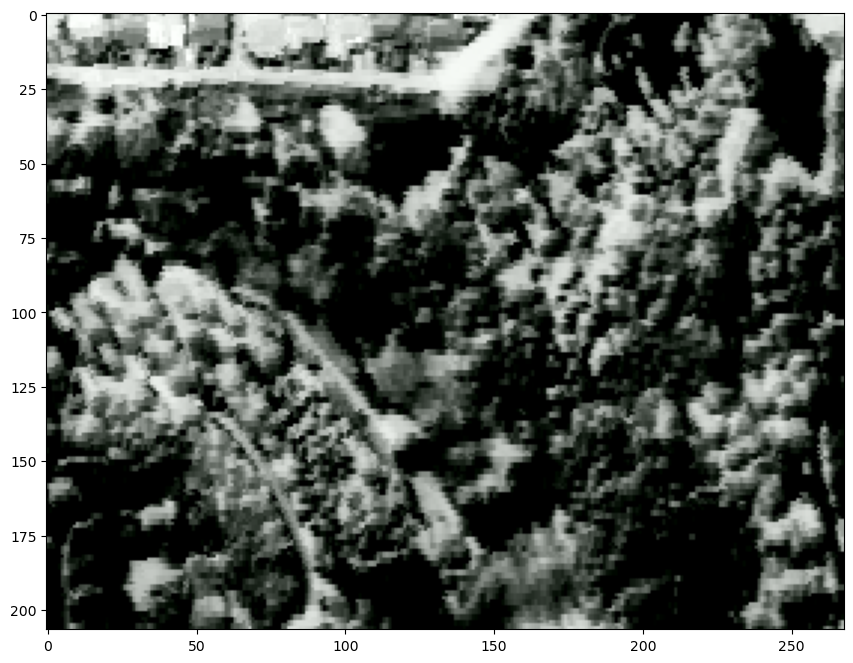

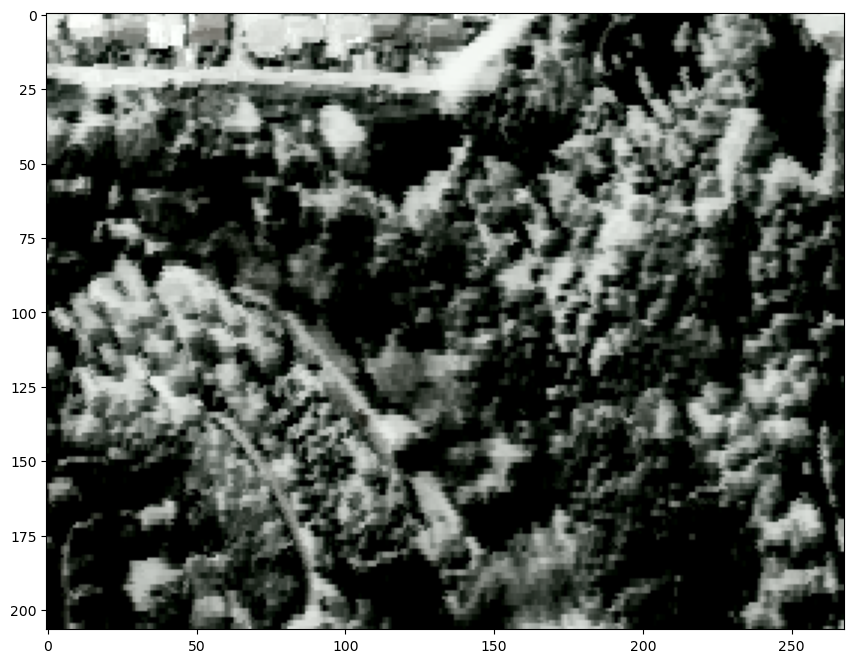

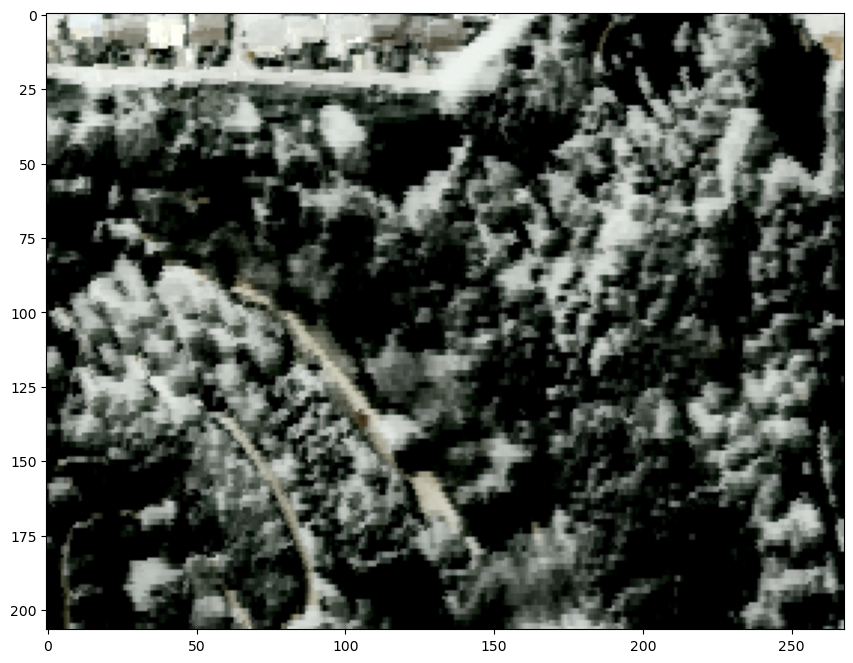

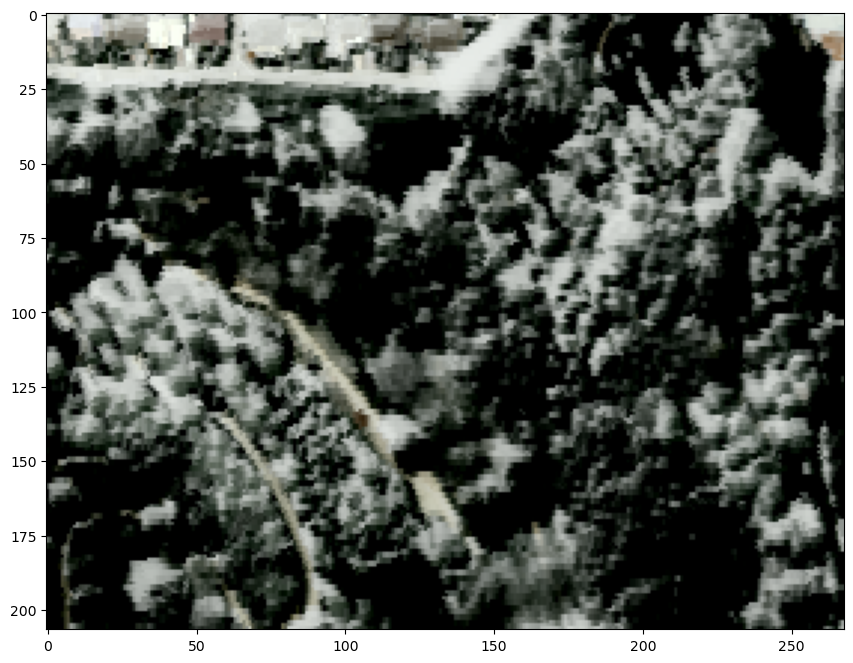

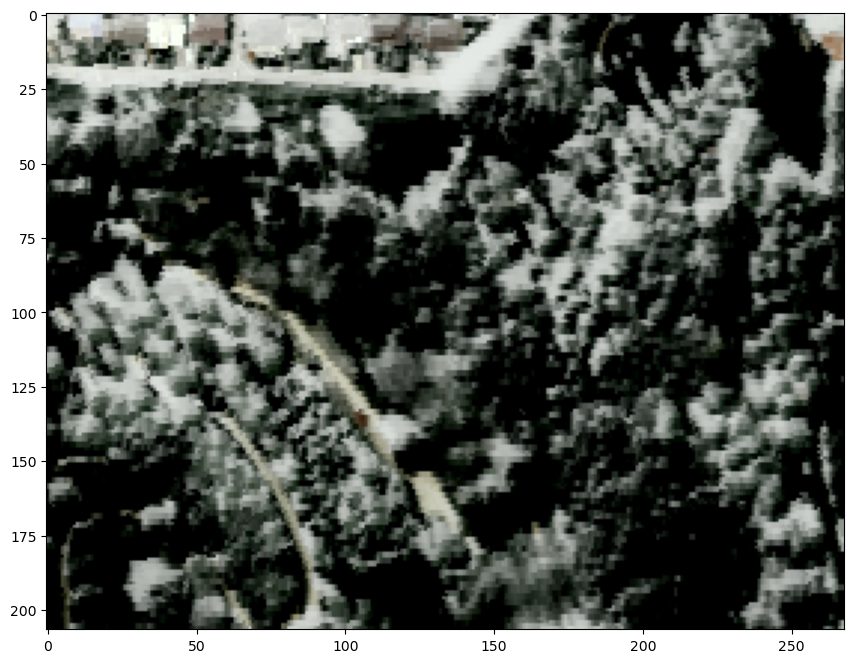

In [188]:
# reconstruct image from only a few components
# rgb image
k = [1,2,5,10,50]
plt.figure(figsize =(30,15))
components= pca.components_
#print(components.shape)
#scores=pca.score(components)
#print(scores.shape)
x_mean = np.broadcast_to(im_r.mean(axis=1).reshape(-1,1), im_r.shape)
#print(x_mean.shape)
re=[]
for i in range(len(k)):
    ua=np.matmul(coefficients[:,0:k[i]],pca.components_[0:k[i],:])
    #print(k[i])
    #x_hash = x_mean + ua
    #plt.imshow(x_hash.reshape(72,268,207).T[:,:,0:1])  
    reconstructed_image = x_mean + ua ## TO DO ##
    rec_im = np.reshape(reconstructed_image.T,(m,n,L))
    plt.figure(figsize = (30,8))
    plt.imshow(enhance_brightness_rgb(rec_im[:,:,[29,18,6]]))
    re.append(rec_im)
#print(re[0]-re[2])

The differences in the above shown imageries might not be visible while scrolling down but there exist slight differences according to the different input.

The differences can be quantitaively observed by differencing the images.

In [189]:
components.shape

(72, 55476)

(72,)


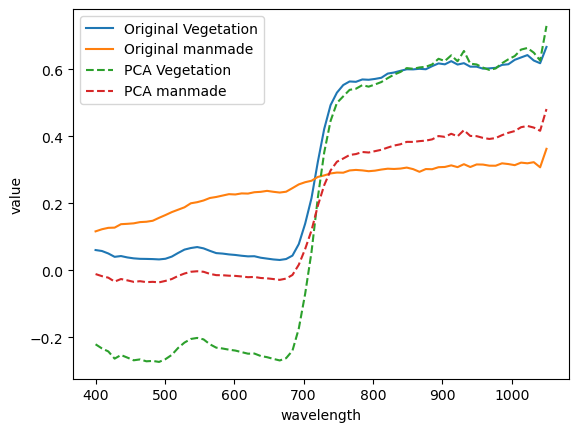

In [190]:
# keep 2 components
    
final_nbr = 2
#scores=pca.score( im_r)
# Out of bound for cpu
#print( np.dot(components[:final_nbr,:].T,scores[:,:final_nbr].T).T.shape)
# print(components[:final_nbr,:].shape)

mean =  np.mean(im_r,axis = 1) 
print(mean.shape)

x_mean = np.broadcast_to(im_r.mean(axis=1).reshape(-1,1), im_r.shape)

ua=np.matmul(coefficients[:,0:2],pca.components_[0:2,:])
    
reconstructed_image = x_mean + ua ## TO DO ##
rec_im = np.reshape(reconstructed_image.T,(m,n,L))


reconstructed_image_final = x_mean + ua
rec_im_final = np.reshape(reconstructed_image_final,(m,n,L))

# absolute difference

## TO DO ##

# pixel reconstruction

plt.figure()
plt.plot(wavelengths, im[50,50,:], label='Original Vegetation',) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:],label='Original manmade') # one man made pixel
## TO DO ##

plt.plot(wavelengths, rec_im[50,50,:], label='PCA Vegetation', linestyle='--') # one vegetation pixel
plt.plot(wavelengths, rec_im[112,90,:], label='PCA manmade', linestyle='--') # one man made pixel
plt.xlabel('wavelength')
plt.ylabel('value')
plt.legend()

**Q: Finally, take a look at the last components and the associated coefficients. Are the components easy to interpret? How about the coefficients: what do they look like? Is it worth it to keep all the components (give 2 reasons why or why not)**

Last component doesnot show significant information. The coefficients associated with the last components are extermely small. Values about -5e-14 shows that the coefficients are neglible. Also, result is not easy to interpret as shown below in the displayed image. 

No, It is in not worth keeping all components because 1) it doesnot show significant information 2) and it increases the dimensionality and size of data. .

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


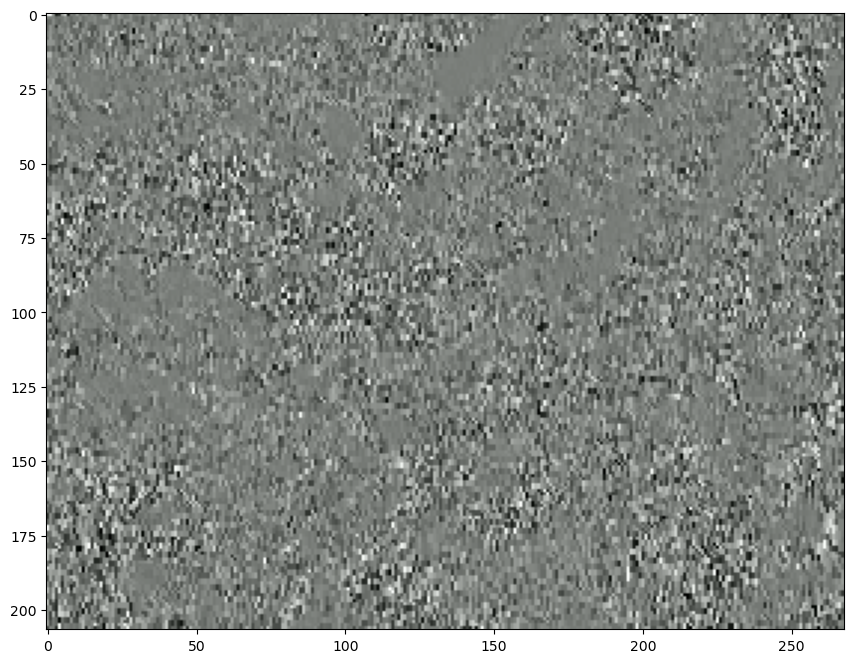

In [191]:
# last components
last_component = components[0:-1,:]
last_component_coeff = coefficients[:,0:-1]

## TO DO ##


ua=np.matmul(coefficients[:,71:72],pca.components_[71:72,:])
#print(k[i])
#x_hash = x_mean + ua
#plt.imshow(x_hash.reshape(72,268,207).T[:,:,0:1])

reconstructed_image = x_mean + ua ## TO DO ##
rec_im = np.reshape(reconstructed_image.T,(m,n,L))
plt.figure(figsize = (30,8))
plt.imshow(enhance_brightness_rgb(rec_im[:,:,[29,18,6]]))


**Q: Bonus: Now perform a new PCA decomposition using only as a dataset the set of labeled pixels. Plot the dataset in the 2D space spanned by the first two components. What can you say about the new components and the separability of both classes rather than in the PCA space of the whole dataset?**

In [192]:
# # %matplotlib qt
# %matplotlib inline
nb_conifer_pixels = np.shape(conifer_pixels[1])
nb_broadleaf_pixels = np.shape(broadleaf_pixels[1])
new_data = np.concatenate((conifer_pixels,broadleaf_pixels),axis = 1)

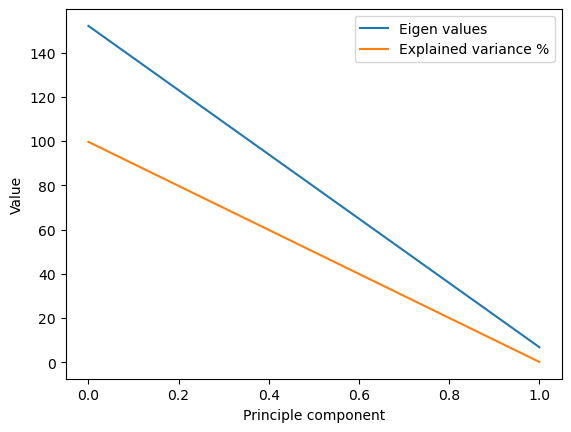

In [197]:
# PCA components
# Compute the PCA

n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA
#from sklearn.preprocessing import StandardScaler
#a=StandardScaler.transform(im_r)
pca.fit(new_data)

## TO DO ##

# Get eigenvalues
eigenvalues= pca.singular_values_

## TO DO ##
explained_variance=pca.explained_variance_ratio_

# display
plt.figure()
plt.plot(eigenvalues, label="Eigen values")
plt.plot(explained_variance*100, label="Explained variance %")

## TO DO ##
plt.xlabel('Principle component')
plt.ylabel('Value')
plt.legend()
plt.show()

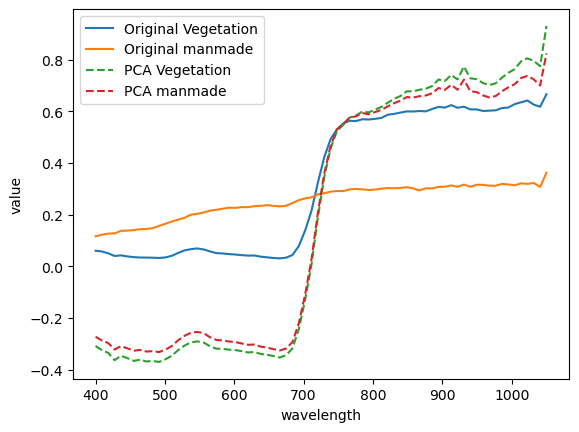

In [198]:
# keep 2 components
    
final_nbr = 2
#scores=pca.score( im_r)
#print( np.dot(components[:final_nbr,:].T,scores[:,:final_nbr].T).T.shape)
# print(components[:final_nbr,:].shape)

#mean =  np.mean(im_r,axis = 1) 
#print(mean.shape)

x_mean = np.broadcast_to(new_data.mean(axis=1).reshape(-1,1), new_data.shape)

ua=np.matmul(coefficients[:,0:2],pca.components_[0:2,:])
    
m2=21
n2=601
L2=72
reconstructed_image = x_mean + ua ## TO DO ##
rec_im = np.reshape(reconstructed_image.T,(m2,n2,L2))


#reconstructed_image_final = x_mean + ua
#rec_im_final = np.reshape(reconstructed_image_final,(m2,n2,L2))

# absolute difference

## TO DO ##

# pixel reconstruction

plt.figure()
plt.plot(wavelengths, im[50,50,:], label='Original Vegetation',) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:],label='Original manmade') # one man made pixel
## TO DO ##

plt.plot(wavelengths, rec_im[20,50,:], label='PCA Vegetation', linestyle='--') # one vegetation pixel
plt.plot(wavelengths, rec_im[20,90,:], label='PCA manmade', linestyle='--') # one man made pixel
plt.xlabel('wavelength')
plt.ylabel('value')
plt.legend()